## Oppstart

### Preamble

Contains imports and some utility code.

In [1]:
from dhlab.module_update import update, css, code_toggle

In [2]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
import networkx as nx
%matplotlib inline

In [3]:
css()

In [4]:
def frame_sort(frame, by=0):
    return frame.sort_values(by=by, ascending=False)

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Kollokasjoner eller assosiasjoner

Hvilke ord opptrer et ord sammen med innenfor et korpus? 

### Define a corpus

Bruk gjerne Dewey eller temaord for å definere korpuset, hold det forholdsvis lite rundt 200 bøker.

In [124]:
korpus = nb.book_urn(ddk='641.2%', period=(1960, 2020), limit=200)
len(korpus)

175


Kommandoen nb.frame() kan benyttes på en hel del output. Gir en fin oversikt over data, og kan brukes .head() for å se de første eksemplene.



In [7]:
nb.frame(korpus).head(10)

,0,1,2,3
0,2014091908001,"De Amicis, Edmondo",Om vinens psykologiske virkninger,2000
1,2011021603028,"Salvesen, Geir",Himmelske kombinasjoner,2010
2,2016022448028,,Italiensk vin,2003
3,2016070548074,"Jørgensen, Helge",Godt i glasset!,2002
4,2011063008113,,Aquavitguiden,2003
5,2016020807502,"Westerhaug, Lene Aarnes",Akevitt,2010
6,2010050403066,"Dege, Hroar",Historien om de norske akevitter,1997
7,2014022408088,"Watson, Jeremy",Vin i Spania,2001
8,2012052308095,"Steingrimsen, Oskar",Din egen dram,1982
9,2014042407072,"Clarke, Oz",Gyldendals vinleksikon,2000


## Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### Bygg kollokasjon

Kommandoen er `urn_coll()`. Legg gjerne inn en sjekk med konkordans.

In [8]:
collword = 'hvitvin'

Så kan vi hente ut selve kollokasjonen,dvs. ord som står innenfor en viss avstand fra målordet.

In [9]:
small_window = 5
large_window = 10

In [99]:
def collpart(collword, urns, win = 5, limit = 10000):
    return nb.urn_coll(collword, urns = korpus, after = win, before = win, limit = 10000)

Kollokasjonen er en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor.

In [100]:
small = collpart(collword, nb.pure_urn(korpus), win = 5)
large = collpart(collword, nb.pure_urn(korpus), win = 10)



## Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### Bokhylla aggregert

In [35]:
tot = nb.frame(nb.totals(top = 50000))

In [36]:
tot.head()

,0
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583


#### Aggregert korpus

In [37]:
korpus_agg = nb.aggregate_urns(korpus)

Gjør den om til dataramme, sorterer og ser på resultatet 
1. Dataramme med kommando `frame()`
2. Sortering med `frame_sort()` definert øverst i den her notebooken.

In [38]:
korpus_agg = frame_sort(nb.frame(korpus_agg))

In [39]:
korpus_agg.head(10)

,0
",",726324
.,607377
og,370316
i,284037
er,222791
av,189591
som,184028
en,155422
med,126502
til,124112


#### Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(small)
nb.normalize_corpus_dataframe(large)

Inspiser dataene etter normalisering

### Aggregert korpus

Fyll inn verdier for `.head()` for å se mer.

In [40]:
korpus_agg.head()

,0
",",726324
.,607377
og,370316
i,284037
er,222791


In [187]:
korpus_agg.sum()

0    13387085
dtype: int64

### Bokhylla total

In [41]:
tot.head()

,0
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583


### Kollokasjonen

In [101]:
small.head()

,0
",",2997
.,2744
og,1917
en,1779
er,1156


In [102]:
large.head()

,0
",",5580
.,5410
og,3522
en,2709
er,2239


Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [103]:
small_assoc = frame_sort(small**1.0/tot)

In [104]:
small_assoc.head(20)

,0
rødvin,0.009124
tørr,0.001869
Blanc,0.001651
hvitvin,0.001417
druer,0.001215
drikkes,0.001071
druene,0.001055
fyldig,0.001051
syrlig,0.000876
Champagne,0.000859


In [46]:
large_assoc = frame_sort(large**1.0/tot)

In [105]:
large_assoc.head(20)

,0
rødvin,0.013169
hvitvin,0.004283
Blanc,0.003374
druene,0.003075
viner,0.002204
druer,0.002174
vinene,0.002112
drikkes,0.002038
tørr,0.002017
Bordeaux,0.001755


### Sammenlign med korpus

Her kan det være nyttig å bruke en eksponent for å dempe effekten av lavfrekvente ord.

In [57]:
import numpy as np

In [59]:
np.log(2)

0.6931471805599453

In [92]:
import pandas as pd

In [151]:
delta = pd.DataFrame()

In [152]:
delta['small'] = small[0]
delta['large'] = large[0]

In [153]:
delta['ratio'] = small[0]/large[0]

In [154]:
#delta['log'] = np.log(delta['ratio'])

In [156]:
#delta['score'] = delta['ratio'] * delta['log']

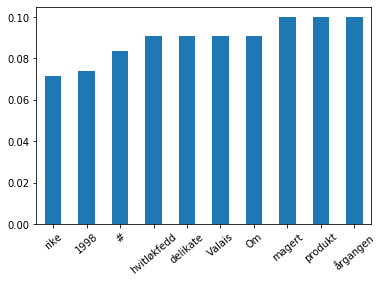

In [157]:
delta[(delta.small > 0)].sort_values(by='ratio', ascending=True)['ratio'][:10].plot(kind='bar', rot=40)

In [158]:
delta.loc[[',','.','og','!', '?']]

,small,large,ratio
",",2997,5580,0.537097
.,2744,5410,0.507209
og,1917,3522,0.544293
!,13,55,0.236364
?,70,133,0.526316


In [159]:
delta.loc[large_assoc.head(20).index].sort_values(by='ratio', ascending=False).style.background_gradient()

,small,large,ratio
tørr,723,844,0.856635
søt,190,229,0.829694
fyldig,104,132,0.787879
syrlig,33,48,0.6875
rødvin,643,979,0.656793
druer,76,136,0.558824
drikkes,31,59,0.525424
Champagne,22,42,0.52381
aroma,12,24,0.5
Blanc,46,94,0.489362


In [190]:
delta_max = delta[delta.small != delta.large][delta.small > 20][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [192]:
delta_max.head(20)

,small,large,ratio
rød-,54,56,0.964286
Tilsett,22,23,0.956522
velger,23,25,0.920000
brukt,21,24,0.875000
tørr,723,844,0.856635
nøytral,38,45,0.844444
Tørr,91,109,0.834862
søt,190,229,0.829694
lage,83,101,0.821782
verdens,22,27,0.814815


In [191]:
delta_max.head(20).index

Index(['rød-', 'Tilsett', 'velger', 'brukt', 'tørr', 'nøytral', 'Tørr', 'søt',
       'lage', 'verdens', 'vanlig', 'rosevin', 'utelukkende', 'dl', 'både',
       'halvtørr', 'Som', 'aromatisk', 'frisk', 'fransk'],
      dtype='object')

In [166]:
large_assoc.head(50).index

Index(['rødvin', 'hvitvin', 'Blanc', 'druene', 'viner', 'druer', 'vinene',
       'drikkes', 'tørr', 'Bordeaux', 'Champagne', 'fyldig', 'syrlig',
       'Chateau', 'sødme', 'sherry', 'gjæring', 'Vinen', 'aroma', 'søt',
       'serveres', 'Frisk', 'forfriskende', 'Vinmonopolet', 'Italias',
       'delikat', 'vinen', 'lages', 'skalldyr', 'champagne', 'syre', 'vin',
       'produseres', 'portugisisk', 'Italiensk', 'etiketten', 'oster',
       'flasker', 'Fylde', 'Farge', 'fløte', 'vulkanske', 'servere', 'smaker',
       'delikate', 'Vin', 'Kraftig', 'avkjølt', 'krydret', 'fyldigere'],
      dtype='object')

In [167]:
small_assoc.head(50).index

Index(['rødvin', 'tørr', 'Blanc', 'hvitvin', 'druer', 'drikkes', 'druene',
       'fyldig', 'syrlig', 'Champagne', 'søt', 'viner', 'vinene', 'Bordeaux',
       'Frisk', 'Italias', 'Chateau', 'sødme', 'forfriskende', 'Farge',
       'lages', 'aroma', 'Italiensk', 'Vinen', 'portugisisk', 'gjæring',
       'produseres', 'sherry', 'skalldyr', 'ganen', 'serveres', 'nøytral',
       'champagne', 'fyldigere', 'krydret', 'sveitsisk', 'skvett', 'Toscana',
       'syre', 'flasker', 'Kraftig', 'vinen', 'delikat', 'italiensk', 'dl',
       'Serveres', 'produserer', 'avkjølt', 'Spanias', 'fløte'],
      dtype='object')

In [183]:
delta_max.head(50).index

Index(['Farge', 'rød-', 'Tilsett', 'velger', 'brukt', 'tørr', 'nøytral',
       'Tørr', 'søt', 'lage', 'verdens', 'vanlig', 'rosevin', 'utelukkende',
       'dl', 'både', 'aromatisk', 'Som', 'halvtørr', 'frisk', 'fransk',
       'fyldig', 'billig', 'stille', 'omfatter', 'gjelder', 'meste',
       'produksjonen', 'glass', 'produsert', 'virkelig', 'bløt', 'lager',
       'rosévin', 'italiensk', 'helst', 'enkel', 'meget', 'elegant', 'kraftig',
       'produksjon', 'Rødvin', 'fruktig', 'syrlig', 'produserer', 'lett', 'En',
       'Et', 'lages', 'gjerne'],
      dtype='object')

In [184]:
set(delta_max.head(50).index) & set(small_assoc.head(50).index)

{'Farge',
 'dl',
 'fyldig',
 'italiensk',
 'lages',
 'nøytral',
 'produserer',
 'syrlig',
 'søt',
 'tørr'}

In [185]:
set(delta_max.head(50).index) & set(large_assoc.head(50).index)

{'Farge', 'fyldig', 'lages', 'syrlig', 'søt', 'tørr'}

In [175]:
set(small_assoc.head(50).index) & set(large_assoc.head(50).index)

{'Blanc',
 'Bordeaux',
 'Champagne',
 'Chateau',
 'Farge',
 'Frisk',
 'Italias',
 'Italiensk',
 'Kraftig',
 'Vinen',
 'aroma',
 'avkjølt',
 'champagne',
 'delikat',
 'drikkes',
 'druene',
 'druer',
 'flasker',
 'fløte',
 'forfriskende',
 'fyldig',
 'fyldigere',
 'gjæring',
 'hvitvin',
 'krydret',
 'lages',
 'portugisisk',
 'produseres',
 'rødvin',
 'serveres',
 'sherry',
 'skalldyr',
 'syre',
 'syrlig',
 'sødme',
 'søt',
 'tørr',
 'vinen',
 'vinene',
 'viner'}

In [ ]:
coll_assoc_korp = frame_sort(coll**1.2/korpus_agg)

In [ ]:
coll_assoc_korp.head(20)

# Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

In [ ]:
nb.cloud(coll_assoc.head(50)/coll_assoc.sum())

In [ ]:
nb.cloud(coll_assoc_korp.head(50)/coll_assoc_korp.sum())

## Hva med å dividere korpuset på totalen?

In [ ]:
korpus_ord =  frame_sort(korpus_agg**1.2/tot)

In [ ]:
korpus_ord.head(20)

In [ ]:
nb.cloud(korpus_ord.head(50)/korpus_ord.sum())